In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
Main_dir = "/Users/somesh/Desktop/IITH_PROJECTS/Human_Emotion_detector"
Text_data_dir = "/Users/somesh/Desktop/IITH_PROJECTS/Human_Emotion_detector/Text_data"

In [3]:
Text_data_Path = os.path.join(Text_data_dir,"tweet_emotions.csv")
text_df = pd.read_csv(Text_data_Path)# /Users/somesh/Desktop/IITH_PROJECTS/Human_Emotion_detector/Text_data/tweet_emotions.csv
print(f"shape of text data: {text_df.shape}")
text_df.head()

shape of text data: (40000, 3)


,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [4]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [5]:
text_df.drop(['tweet_id'],axis=1,inplace=True)

In [6]:
# Count duplicates
duplicates_count = text_df.duplicated().sum()
print(f'Total duplicated rows: {duplicates_count}')

Total duplicated rows: 91


In [7]:
text_df[text_df['content'].duplicated()== True]

,sentiment,content
366,worry,I feel so deflated. No more doggy.
521,worry,Somebody please save the polar bears!
1026,neutral,I'm at work
3684,sadness,@dublins98dave me too! I am down 400 euro
4363,worry,"is upset, I left my phone at home again"
...,...,...
39859,love,Happy Mothers Day
39898,love,happy mothers day!
39913,happiness,happy mother's day!
39915,love,happy mother's day everyone


In [8]:
index = text_df[text_df['content'].duplicated()== True].index
# Drop duplicates
text_df.drop(index, inplace=True)
# Reset index after dropping duplicates
text_df.reset_index(drop=True, inplace=True)
print(f"shape of text data after removing duplicates: {text_df.shape}")

shape of text data after removing duplicates: (39827, 2)


In [9]:
#unique sentiments
unique_sentiments = text_df['sentiment'].unique()
print(f"unique sentiments: {unique_sentiments}")

unique sentiments: ['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']


            count  percentage
sentiment                    
neutral      8598   21.588370
worry        8437   21.184121
happiness    5184   13.016295
sadness      5154   12.940970
love         3785    9.503603
surprise     2181    5.476184
fun          1775    4.456776
relief       1522    3.821528
hate         1322    3.319356
empty         822    2.063926
enthusiasm    758    1.903231
boredom       179    0.449444
anger         110    0.276195


<Axes: ylabel='sentiment'>

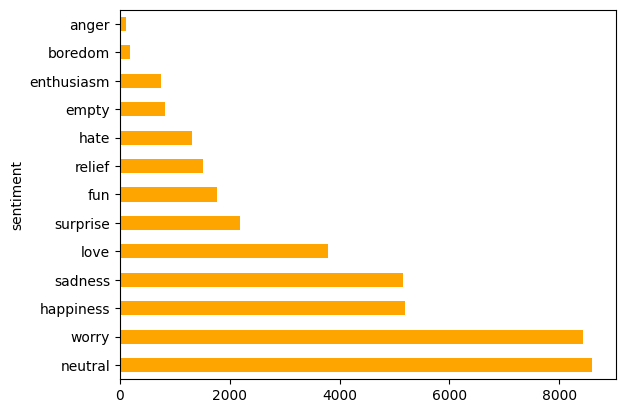

In [10]:

frequency_counts = text_df['sentiment'].value_counts()
frequency_percentage = (frequency_counts / len(text_df['sentiment'])) * 100

# print(frequency_counts)

frequency_df = pd.DataFrame(data={'count' : frequency_counts, 'percentage' : frequency_percentage})
print(frequency_df)

text_df['sentiment'].value_counts().plot(kind='barh',color='orange')


<Axes: ylabel='sentiment'>

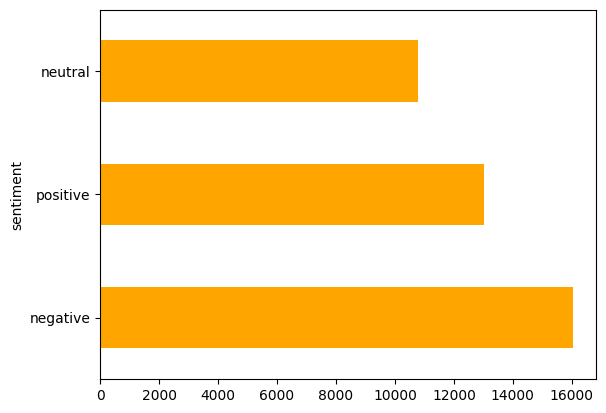

In [11]:
sentiment_mapping = {
    'empty': 'negative',
    'sadness': 'negative',
    'worry': 'negative',
    'hate': 'negative',
    'boredom': 'negative',
    'anger': 'negative',
    'enthusiasm': 'positive',
    'neutral': 'neutral',
    'surprise': 'neutral',
    'love': 'positive',
    'fun': 'positive',
    'happiness': 'positive',
    'relief': 'positive'
}

text_df['sentiment'] = text_df['sentiment'].map(sentiment_mapping)
text_df['sentiment'].value_counts().plot(kind='barh',color='orange')



In [12]:
text_df.head()

,sentiment,content
0,negative,@tiffanylue i know i was listenin to bad habi...
1,negative,Layin n bed with a headache ughhhh...waitin o...
2,negative,Funeral ceremony...gloomy friday...
3,positive,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [13]:
SENTIMENT_CLASS = text_df['sentiment'].unique()
print(f"sentiment classes: {SENTIMENT_CLASS}")

sentiment classes: ['negative' 'positive' 'neutral']


In [14]:
import re
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()


def clean_content(text):
    
    text = re.sub(r'[^a-zA-Z]',' ',text)
    
    text = re.sub(r'\s+', ' ', text)
    
    text = text.lower()
    
    text = text.split()  
    
    text = [word for word in text if word not in stop_words and len(word)>1]
    
    text = [stemmer.stem(word) for word in text]
    
    text = " ".join(text)
    
    return text

clean_content("tun 299ijif  npggrgmg % %%$$ v jnnrnr%%8 httpdmfnf//e www.google.com ")

text_df['content'] = text_df['content'].apply(clean_content)
text_df['content'].head()
    
    
    
    

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/somesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/somesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    tiffanylu know listenin bad habit earlier star...
1                 layin bed headach ughhhh waitin call
2                         funer ceremoni gloomi friday
3                                want hang friend soon
4    dannycastillo want trade someon houston ticket...
Name: content, dtype: object

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.pipeline import Pipeline


X_train,X_test,y_train,y_test = train_test_split(text_df['content'], text_df['sentiment'], test_size=0.2, random_state=23,shuffle=True)

text_Encoder = LabelEncoder()
y_train = text_Encoder.fit_transform(y_train)
y_test = text_Encoder.transform(y_test)
SENTIMENT_CLASS_NAMES = text_Encoder.classes_ 

print(f"Class names: {SENTIMENT_CLASS_NAMES}")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")



Class names: ['negative' 'neutral' 'positive']
X_train shape: (31861,), y_train shape: (31861,)
X_test shape: (7966,), y_test shape: (7966,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

LR_PIPE = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2),min_df =1,smooth_idf=True,norm='l2')),
    ('lr_clf',LogisticRegression(random_state=23,solver='liblinear'))
])

param_grid = {
    'tfidf__max_features': [2000, 3000, 5000],
    'tfidf__sublinear_tf': [True, False],
    
    'lr_clf__C': [0.1, 1, 0.5, 2],
}

grid_search = GridSearchCV(LR_PIPE, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

lr_best_model = grid_search.best_estimator_
y_pred = lr_best_model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'lr_clf__C': 0.5, 'tfidf__max_features': 5000, 'tfidf__sublinear_tf': True}
Best score: 0.5737107534148547
Accuracy: 0.5696711021842832


In [ ]:
from sklearn.svm import SVC

SV_PIPE = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2),min_df =1,smooth_idf=True,norm='l2')),
    ('sv_clf',SVC(random_state=23))
])

param_grid = {
    'tfidf__max_features': [3000, 5000],
    'tfidf__sublinear_tf': [True, False],
    
    'sv_clf__C': [0.1, 1, 0.5],
    'sv_clf__kernel': ['linear', 'rbf', 'poly'],
}

grid_search = GridSearchCV(SV_PIPE, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

sv_best_model = grid_search.best_estimator_
y_pred = sv_best_model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

In [ ]:
!pip install scikeras

X_train shape: (31861, 6000), X_test shape: (7966, 6000)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 64)             │       384,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 391,043 (1.49 MB)

 Trainable params: 390,723 (1.49 MB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4044 - loss: 1.5254 - val_accuracy: 0.5330 - val_loss: 1.1680
Epoch 2/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5498 - loss: 1.1540 - val_accuracy: 0.5539 - val_loss: 1.1309
Epoch 3/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6068 - loss: 1.0648 - val_accuracy: 0.5567 - val_loss: 1.1282
Epoch 4/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6394 - loss: 1.0126 - val_accuracy: 0.5542 - val_loss: 1.1342
Epoch 5/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6747 - loss: 0.9694 - val_accuracy: 0.5513 - val_loss: 1.1591
Epoch 6/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6867 - loss: 0.9519 - val_accuracy: 0.5510 - val_loss: 1.1795
Epoch 7/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7079 - loss: 0.9312 - val_accuracy: 0.5421 - val_loss: 1.2086
Epoch 8/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7212 - loss: 0.9131 - val_accuracy: 0.

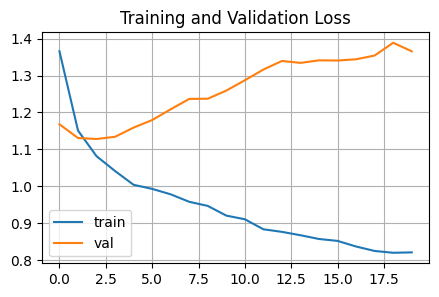

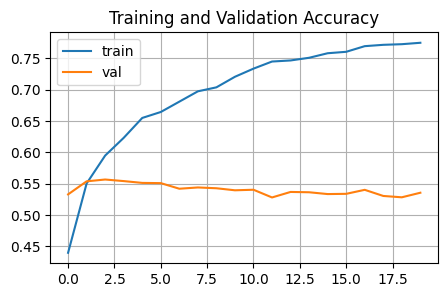

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.5203 - loss: 1.4246
accuracy of dl model is 0.5289982557296753


In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=1, smooth_idf=True, norm='l2', max_features=6000)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")


dlmodel = Sequential()

dlmodel.add(Input(shape=(X_train.shape[1],)))

dlmodel.add(Dense(64, activation='relu',kernel_regularizer=l2(1e-3)))
dlmodel.add(BatchNormalization())
dlmodel.add(Dropout(0.4))

# dlmodel.add(Dense(128, activation='relu'))
# dlmodel.add(BatchNormalization())
# dlmodel.add(Dropout(0.2))

dlmodel.add(Dense(64, activation='relu',kernel_regularizer=l2(1e-3)))
dlmodel.add(BatchNormalization())
dlmodel.add(Dropout(0.2))

dlmodel.add(Dense(32, activation='relu',kernel_regularizer=l2(1e-3)))
dlmodel.add(BatchNormalization())
dlmodel.add(Dropout(0.4))

dlmodel.add(Dense(len(SENTIMENT_CLASS_NAMES), activation='softmax'))
dlmodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

dlmodel.summary()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3,restore_best_weights=True)
hist = dlmodel.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.25, batch_size=32,callbacks=[es])

plt.figure(figsize=(5,3))
plt.title('Training and Validation Loss')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(5,3))
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'],label='val')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.show()

print(f"accuracy of dl model is {dlmodel.evaluate(X_test, y_test)[1]}")


In [83]:
# M3 USING TOKENIZER AND PAD SEQUENCES
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(oov_token="OOV")
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
# word_index is a dict mapping each word → its assigned integer index

vocab_size = len(word_index)  # number of unique words seen

input_dim = vocab_size + 1  # reserving index 0 for padding (the default of pad_sequences)
# input_dim   = min(10000, vocab_size + 1)  #

print(f"input dim is {input_dim} and vocab_size is {vocab_size}")

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

MAX_LEN = max(len(x) for x in X_train )  # Find the maximum length of sequences

print(f"max len value is {MAX_LEN}")

X_train = pad_sequences(X_train, maxlen=MAX_LEN, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=MAX_LEN, padding='post', truncating='post')

input dim is 33197 and vocab_size is 33196
max len value is 25


In [80]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier( random_state=42)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.3779814210394175


In [ ]:
from tensorflow.keras.layers import SimpleRNN,Embedding

model = Sequential()
model.add(Input(shape=(MAX_LEN,)))#to see parameter count,otherwise model willl not built 

model.add(Embedding(input_dim=input_dim, output_dim=256))
model.add(SimpleRNN(64, activation='tanh',return_sequences=True))
model.add(Dropout(0.3))

model.add(SimpleRNN(64, activation='tanh'))
model.add(Dropout(0.3))

model.add(Dense(len(SENTIMENT_CLASS_NAMES), activation='softmax'))  # For binary classification
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[es])

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 25, 256)        │     8,498,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 25, 64)         │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 25, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_7 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,527,427 (32.53 MB)

 Trainable params: 8,527,427 (32.53 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.4492 - loss: 1.0757 - val_accuracy: 0.5591 - val_loss: 0.9507
Epoch 2/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.6888 - loss: 0.7488 - val_accuracy: 0.5371 - val_loss: 1.0498
Epoch 3/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8754 - loss: 0.3561 - val_accuracy: 0.4798 - val_loss: 1.3997
Epoch 4/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9361 - loss: 0.1897 - val_accuracy: 0.4951 - val_loss: 1.6309
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5398 - loss: 0.9703
Test Loss: 0.9633303284645081, Test Accuracy: 0.5456941723823547


In [85]:
from tensorflow.keras.layers import SimpleRNN,Embedding,LSTM,Bidirectional

model = Sequential()
model.add(Input(shape=(MAX_LEN,)))
model.add(Embedding(input_dim=input_dim, output_dim=256))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))

model.add(Dense(len(SENTIMENT_CLASS_NAMES), activation='softmax'))  # For binary classification
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[es])

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 25, 256)        │     8,498,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 25, 128)        │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,761,987 (33.42 MB)

 Trainable params: 8,761,987 (33.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - accuracy: 0.4952 - loss: 1.0025 - val_accuracy: 0.5743 - val_loss: 0.9074
Epoch 2/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.7038 - loss: 0.7231 - val_accuracy: 0.5443 - val_loss: 1.0061
Epoch 3/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 29s 72ms/step - accuracy: 0.8420 - loss: 0.4282 - val_accuracy: 0.5258 - val_loss: 1.2373
Epoch 4/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.9009 - loss: 0.2753 - val_accuracy: 0.5098 - val_loss: 1.3454
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5613 - loss: 0.9326
Test Loss: 0.9197988510131836, Test Accuracy: 0.5705498456954956


In [ ]:
#the end